In [1]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


### Potential Energy

* [Potential Energy Lecture](http://people.umass.edu/kastor/energy/pdflectures/Lecture-3.pdf)

먼저 Momentum을 이해하기 위해서는 물리학에서 사용되는 Potential Energy라는 개념을 알고 있어야 합니다.<br>
산꼭대기의 돌맹이 자체에는 kinetic energy가 없지만, 밀어서 절벽으로 떨어뜨리면 kinetic energy가 생기게 됩니다. <br>
이 경우에 돌맹이에 potential energy가 있다고 말할수 있습니다.

$$ PE = mgh $$

* **m:** 돌맹이의 mass
* **h:** 지표면에서 얼마나 높이 떨어져있는지.. height
* **g:** Gravitational constant 지구의 중력..

여기서 g를 조금더 설명한다면.. 떨어지는 물체는 $ g = \frac{9.8m}{s^2} $ 같은 가속도가 붙습니다. <br>
가속도는 시간에 따른 속도(velocity)의 변화량 (rate of change) 입니다.<br>
즉.. velocity를 시간으로 나눠준것입니다.

* 속도(velocity)는 acceleration * time 입니다. $ v = a \cdot t $ 
* 가속도(acceleration)은 velocity/time 입니다. $ a = \frac{v}{t} $

**뉴턴의 제2법칙**

$$ F =m \cdot a $$

* **F:** 힘(force)
* **m:** Mass
* **a:*** Acceleration

여기에서 gravitational force로 보면.. 

$$ F = m \cdot g $$

# Momentum

* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-3/)

## Data

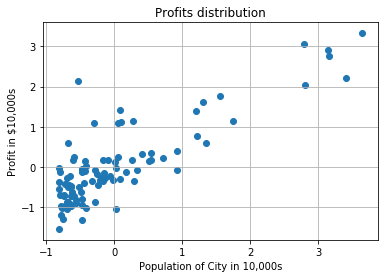

In [2]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)

scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
grid()

### Momentum Update

물리학적인 관점에서 optimization problem을 바라봤을때, convergence rate를 향상시킬수 있는 방법이 있습니다. <br>
Loss를 산등성이에서 height로 바라봤을때 물리학적으로 potential energy를 갖을수 있게 됩니다.) (TODO:추가 연구 필요) 

negative gradient는 양옆 가파른 산골짜기의 한쪽을 타고 조금씩 내려오는 형태와 유사하기 때문에 SGD는 convergence까지 매우 느립니다. (특히 초기 steep gain이후에 계속해서 더 느려짐) 



$$ \begin{align}
v &= \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta; x^{(i)},y^{(i)}) \\
\theta &= \theta - v
\end{align} $$

위의 SGD예제처럼 gradient값이 집접적으로 weights에 영향을 주는것이 아니라, gradient값은 오직 velocity에 영향을 주게 됩니다. <br>
그 뒤 velocity는 weights값에 영향을 미치게 됩니다.

**코드에서 구현은 안되어 있지만 일반적으로 momentum은 0.5에서 시작해서 끝날때쯤에는 0.99까지 가게 만드는게 일반적입니다**

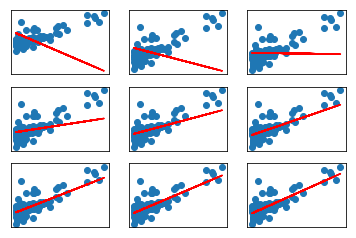

In [5]:
w = np.array([-0.1941133,  -2.07505268])

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return yhat

def momentum_nn(X, Y, w, eta=0.1, gamma=0.5):
    N = len(X)
    v = np.zeros(w.shape[1:])
    v_b = np.zeros(1)
    
    for i in range(N):
        x = X[i]
        y = Y[i]
        yhat = predict(w, x)
        delta = y - yhat

        v = gamma*v + 2/N * eta * np.sum(-delta.dot(x))
        v_b = gamma*v_b + 2/N * eta * np.sum(-delta)
        
        w[1:] = w[1:] - v
        w[0] = w[0] - v_b
    return w
    

for i in range(1, 10):
    w = momentum_nn(X, Y, w)
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')